# Indmat prosjekt
###### Liva Berge Flo, André Pettersen-Dahl, Herman Neple

#### Oppgave 1

#### Oppgave 3

3.1

Vi begynner med å importere alle bibliotek vi trenger

In [1]:
from layers import *
from neural_network import NeuralNetwork
from utils import onehot
import numpy as np
from data_generators import get_train_test_sorting
import matplotlib.pyplot as plt

For å teste om lagene vi har implementert fungerer, kan vi manuelt kjøre gjennom algoritmen. Vi starter med å initalisere lagene til det nevrale nettverk.

Vi kan da endelig sjekke loss-funksjonens verdi

In [2]:
#definerer variabler
r = 5
m = 2

d = 10
k = 5
p = 15
L = 2

embed = EmbedPosition(9,m,d)
att1 = Attention(d,k)
att2 = Attention(d,k)
ff1 = FeedForward(d,p)
ff2 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

nn = NeuralNetwork([embed, att1, ff1, att2, ff2, un_embed, softmax])

data = get_train_test_sorting(r, m, samples_per_batch=250,n_batches_train=20, n_batches_test=4)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']




In [3]:
def test_Adam(x_data, y_data, n_iters, step_size, m):
    n_batches = x_data.shape[0]
    mean_losses = np.zeros(n_iters)
    for j in range(n_iters):
        losses = []
        for i in range(n_batches):
            x = x_data[i]
            y = y_data[i]

            X = onehot(x,m)
            Z = nn.forward(X)

            losses.append(loss.forward(Z,y))
            dLdZ = loss.backward()
            nn.backward(dLdZ)
            nn.step_Adam()
        mean_loss = np.mean(losses)
        print("Iterasjon ", str(j+1), " L = ",mean_loss, "")
        mean_losses[j] = mean_loss
    return mean_losses

In [4]:
plt.plot(np.arange(0,300), np.log(test_Adam(data['x_train'], data['y_train'], 300, 0.0001, m)))
plt.xlabel("Iterasjonnummer")
plt.ylabel("Logaritmen av loss-funksjon")
plt.title("Minimering ved antall iterasjoner")
plt.figure(figsize=(15,12))
plt.show()

Iterasjon  1  L =  0.6890020418508411 
Iterasjon  2  L =  0.6774366671261773 
Iterasjon  3  L =  0.6542806472898902 
Iterasjon  4  L =  0.607907410340587 
Iterasjon  5  L =  0.5620722198586787 
Iterasjon  6  L =  0.5336585563224747 
Iterasjon  7  L =  0.5122162503665322 
Iterasjon  8  L =  0.4903172706313622 
Iterasjon  9  L =  0.4670195775076474 
Iterasjon  10  L =  0.4403838936979011 
Iterasjon  11  L =  0.40307983542290093 
Iterasjon  12  L =  0.3874686278075735 
Iterasjon  13  L =  0.37962942967620256 
Iterasjon  14  L =  0.3622189305742648 
Iterasjon  15  L =  0.34742489743764643 
Iterasjon  16  L =  0.3320245480160218 


#### Tester for en itterasjon for å se om den greier å predikere neste verdi

In [ ]:
print(np.argmax(nn.forward(onehot(np.array([[1, 0 ,0, 1, 1]]), m)),axis=1))

[[0 1 1 0 0]]


Når vi sender inn arrayet [1, 0, 0, 1, 1], vil vi ved å sende det gjennom algoritmen få predikert den første predikerte verdien som det siste elementet i det returnerte arrayet, som beskrevet i avsnitt 1.2. Siden algoritmen sorterer verdiene i arrayet bestående av 0 og 1, forventer vi at det første sifferet i det sorterte arrayet blir 0. Deretter, for å predikere resten av sekvensen, mater vi inn det siste elementet i det predikerte arrayet tilbake inn i arrayet vi sender gjennom 'forward'-steget, og fortsetter prediksjonen derfra.

In [ ]:
#Prediksjonsfunksjon
def predict(nn: NeuralNetwork, xs: dict, r:int, m:int):
    
    batches = xs.shape[0]
    y = np.zeros((xs.shape[0],xs.shape[1],r))
    for i in range(batches):
        x = xs[i]
        for j in range(r):
            #print(j)
            X = onehot(x,m)
            z = nn.forward(X)
            Z = np.argmax(z, axis=1)
            #print(Z.shape)
            #print(x.shape)
            toAppend =Z[:,-1:]
            x = np.append(x, toAppend, axis=1)
        y[i,:,:] = x[:,:-r]
    return y


y_pred = predict(nn, x_test, r, m)

def count_correct_predictions(y_pred, y_test):
    correct_predictions = np.count_nonzero(np.count_nonzero(y_pred == y_test, axis=2) == y_pred.shape[-1])
    return correct_predictions

y_test = data['y_test']
correct_predictions = count_correct_predictions(y_pred, y_test)
print("Antall rette prediksjoner:", correct_predictions)
print("Totalt antall prediksjoner:", y_pred.shape[1])
print("Prosentvis riktige predikasjoner:", (correct_predictions/y_pred.shape[1])*100, "%")


Antall rette prediksjoner: 191
Totalt antall prediksjoner: 250
Prosentvis riktige predikasjoner: 76.4 %


Når to forskjellige verdier kan forekomme på fem ulike steder, resulterer dette i totalt $32$ mulige kombinasjoner ($2^5 = 32$). Denne mangfoldigheten gjør det praktisk talt umulig å teste algoritmen vår med nye sekvenser. Ideelt sett ville tapet tendert mot null, og prediksjonene ville vært korrekte hver gang, siden algoritmen burde gjenkjenne det riktige svaret ($y$) i stedet for å forutsi neste sekvens. Dette antyder at vektene våre kanskje ikke er optimalt tilpasset.

In [ ]:
#definerer variabler
r = 7
m = 5
n_max = 2*r-1

d = 20
k = 10
p = 25
L = 2

embed = EmbedPosition(n_max,m,d)
att1 = Attention(d,k)
ff1 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

nn = NeuralNetwork([embed, att1, ff1, un_embed, softmax])

data = get_train_test_sorting(r, m, samples_per_batch=250,n_batches_train=10, n_batches_test=4)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']


In [ ]:
plt.plot(np.arange(0,300), np.log(test_Adam(data['x_train'], data['y_train'], 300, 0.1,m)))
plt.xlabel("Iterasjonnummer")
plt.ylabel("Logaritmen av loss-funksjon")
plt.title("Minimering ved antall iterasjoner")
plt.figure(figsize=(15,12))
plt.show()

Iterasjon  1  L =  1.572640318045852 
Iterasjon  2  L =  1.391147793889472 
Iterasjon  3  L =  1.3043925790025224 
Iterasjon  4  L =  1.2800263053002383 
Iterasjon  5  L =  1.2517993039302016 
Iterasjon  6  L =  1.2405835628485966 
Iterasjon  7  L =  1.2220598040169748 
Iterasjon  8  L =  1.211828773339465 
Iterasjon  9  L =  1.2441512628656164 
Iterasjon  10  L =  1.2081848802863329 
Iterasjon  11  L =  1.2161420198891255 
Iterasjon  12  L =  1.2231510717159935 
Iterasjon  13  L =  1.1866360410840022 
Iterasjon  14  L =  1.163608121787932 
Iterasjon  15  L =  1.1384294464229465 
Iterasjon  16  L =  1.1317193481897976 
Iterasjon  17  L =  1.1833289707947068 
Iterasjon  18  L =  1.166525770444061 
Iterasjon  19  L =  1.171006389160798 
Iterasjon  20  L =  1.1626304246113404 
Iterasjon  21  L =  1.1609131785163023 
Iterasjon  22  L =  1.1846746773928645 
Iterasjon  23  L =  1.1885592281461659 
Iterasjon  24  L =  1.1813071505186048 
Iterasjon  25  L =  1.2159597246833584 
Iterasjon  26  

In [ ]:
y_pred = predict(nn, x_test, r, m)
y_test = data['y_test']

correct_predictions = count_correct_predictions(y_pred, y_test)
print("Antall rette prediksjoner:", correct_predictions)
print("Totalt antall prediksjoner:", y_pred.shape[1])
print("Prosentvis riktige predikasjoner:", (correct_predictions/y_pred.shape[1])*100, "%")


Antall rette prediksjoner: 4
Totalt antall prediksjoner: 250
Prosentvis riktige predikasjoner: 1.6 %


In [ ]:
from data_generators import get_train_test_addition
#definerer variabler
r = 6
m = 10
n_max = 3*r

d = 30
k = 20
p = 40
L = 3


data = get_train_test_addition(2, samples_per_batch=250,n_batches_train=20, n_batches_test=4)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

Iterasjon  1  L =  1.9314808853267027 
Iterasjon  2  L =  1.9449940943469126 
Iterasjon  3  L =  1.9270490826652291 
Iterasjon  4  L =  1.9164284513010479 
Iterasjon  5  L =  1.8856056208148684 
Iterasjon  6  L =  1.918175770275734 
Iterasjon  7  L =  1.8925018945910104 
Iterasjon  8  L =  1.8839834613187325 
Iterasjon  9  L =  1.8849269593196005 
Iterasjon  10  L =  1.8921413470559625 
Iterasjon  11  L =  1.9351344004623758 
Iterasjon  12  L =  1.9152740742914875 
Iterasjon  13  L =  1.9511413582092754 
Iterasjon  14  L =  1.9273481005512205 
Iterasjon  15  L =  1.9688570205859492 
Iterasjon  16  L =  1.9599358269061409 
Iterasjon  17  L =  1.9374249826964014 
Iterasjon  18  L =  1.912280856688072 
Iterasjon  19  L =  1.923110341134684 
Iterasjon  20  L =  1.902563242430226 
Iterasjon  21  L =  1.9274244042517836 
Iterasjon  22  L =  1.9297919715444867 
Iterasjon  23  L =  1.9231812569141105 
Iterasjon  24  L =  1.8799918612684265 
Iterasjon  25  L =  1.880672338766629 
Iterasjon  26 

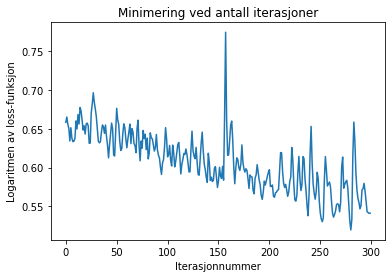

<Figure size 1080x864 with 0 Axes>

In [ ]:
plt.plot(np.arange(0,300), np.log(test_Adam(data['x_train'], data['y_train'], 300, 0.1,m)))
plt.xlabel("Iterasjonnummer")
plt.ylabel("Logaritmen av loss-funksjon")
plt.title("Minimering ved antall iterasjoner")
plt.figure(figsize=(15,12))
plt.show()